<a href="https://colab.research.google.com/github/rubengamarro/Kobe/blob/main/kobe(tipo_de_tiro)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

In [ ]:
import pandas as pd

# Cargamos la base de datos
kobedata = pd.read_csv('https://raw.githubusercontent.com/raguiso/kobebryant/main/data.csv', sep =',')

# Filtrar las temporadas entre 1998/99 y 2012/13
# Primero, nos aseguramos de que el valor de la season esté en formato numérico
kobedata['season_numeric'] = kobedata['season'].apply(lambda x: int(x.split('-')[0]))

# Ahora filtramos las temporadas deseadas
kobedata_filtered = kobedata[(kobedata['season_numeric'] >= 1998) & (kobedata['season_numeric'] <= 2012)]

# Eliminamos las columnas que no se van a analizar (ahora después del filtrado)
columns_to_drop_estudio = ['shot_type', 'game_event_id', 'game_id', 'lat','lon', 'team_id', 'loc_x', 'loc_y',
                           'minutes_remaining', 'season', 'shot_zone_area', 'period', 'game_date', 'matchup',
                           'opponent', 'team_name', 'playoffs', 'seconds_remaining', 'shot_zone_range',
                            'shot_distance', 'shot_id', 'shot_zone_basic','season_numeric','combined_shot_type']

kobedata_estudio = kobedata_filtered.drop(columns=columns_to_drop_estudio)

# Convertir las variables categóricas restantes a variables dummy
kobedata_estudio = pd.get_dummies(kobedata_estudio)

# Eliminar filas con NaN
kobedata_estudio.dropna(inplace=True)

columns_to_drop_estudio = ['action_type_Jump Shot','action_type_Layup Shot']
kobedata_estudio = kobedata_estudio.drop(columns=columns_to_drop_estudio)
# Mostrar las primeras filas del dataframe resultante
kobedata_estudio


,shot_made_flag,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Finger Roll Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,...,action_type_Running Slam Dunk Shot,action_type_Running Tip Shot,action_type_Slam Dunk Shot,action_type_Step Back Jump shot,action_type_Tip Shot,action_type_Turnaround Bank shot,action_type_Turnaround Fadeaway shot,action_type_Turnaround Finger Roll Shot,action_type_Turnaround Hook Shot,action_type_Turnaround Jump Shot
1,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,0.0,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
30692,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30694,1.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30695,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='shot_made_flag', ylabel='index'>

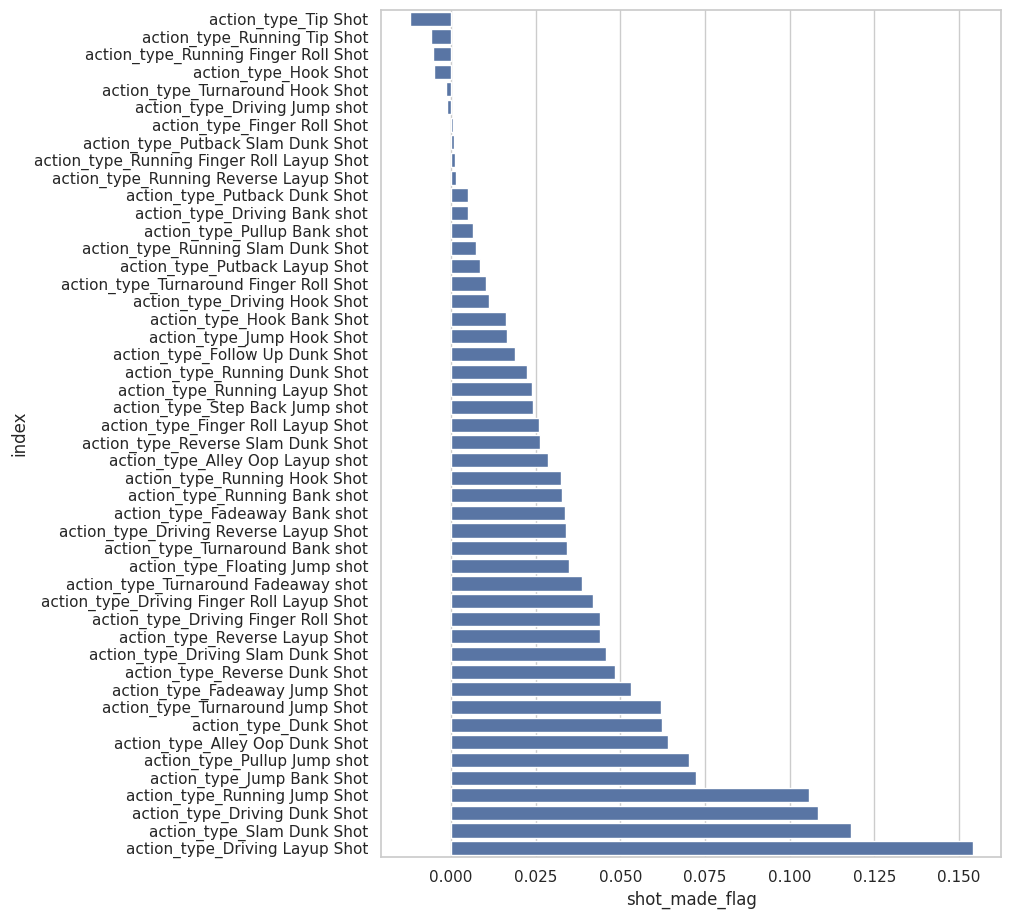

In [ ]:
plt.figure(figsize=(8,11))
corr = kobedata_estudio.corr()['shot_made_flag'].sort_values(ascending=True).reset_index()[0:48]
sns.barplot(data=corr, x='shot_made_flag',y='index')

In [ ]:
X = kobedata_estudio.drop('shot_made_flag', axis=1)
y = kobedata_estudio['shot_made_flag'].values
###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=444)
###
print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

from sklearn import metrics
pred_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred_test))

X_train:(18336, 48)
X_test:(4584, 48)

y_train:(18336,)
y_test:(4584,)
0.680628272251309


In [ ]:
print("Coeficiente:", list(zip(X.columns, model.coef_.flatten(), )))

Coeficiente: [('action_type_Alley Oop Dunk Shot', 2.9542328757743186), ('action_type_Alley Oop Layup shot', 1.2994740873387145), ('action_type_Driving Bank shot', 0.39538589724203005), ('action_type_Driving Dunk Shot', 3.624116013643618), ('action_type_Driving Finger Roll Layup Shot', 2.0462127450828915), ('action_type_Driving Finger Roll Shot', 2.027234610179715), ('action_type_Driving Hook Shot', 0.857854598383191), ('action_type_Driving Jump shot', 0.2836624309802692), ('action_type_Driving Layup Shot', 1.7495553325485076), ('action_type_Driving Reverse Layup Shot', 1.35459349287631), ('action_type_Driving Slam Dunk Shot', 2.828871160181554), ('action_type_Dunk Shot', 1.918680834644951), ('action_type_Fadeaway Bank shot', 2.3339492099397385), ('action_type_Fadeaway Jump Shot', 1.0169219573997286), ('action_type_Finger Roll Layup Shot', 1.7672962813427693), ('action_type_Finger Roll Shot', 0.5631643964190288), ('action_type_Floating Jump shot', 1.6806434852199938), ('action_type_Foll

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

import pandas as pd

# Cargamos la base de datos
kobedata = pd.read_csv('https://raw.githubusercontent.com/raguiso/kobebryant/main/data.csv', sep =',')

# Filtrar las temporadas entre 1998/99 y 2012/13
# Primero, nos aseguramos de que el valor de la season esté en formato numérico
kobedata['season_numeric'] = kobedata['season'].apply(lambda x: int(x.split('-')[0]))

# Ahora filtramos las temporadas deseadas
kobedata_filtered = kobedata[(kobedata['season_numeric'] >= 1998) & (kobedata['season_numeric'] <= 2012)]

# Eliminamos las columnas que no se van a analizar (ahora después del filtrado)
columns_to_drop_estudio = ['shot_type', 'game_event_id', 'game_id', 'lat','lon', 'team_id', 'loc_x', 'loc_y',
                           'minutes_remaining', 'season', 'shot_zone_area', 'period', 'game_date', 'matchup',
                           'opponent', 'team_name', 'playoffs', 'seconds_remaining', 'shot_zone_range',
                            'shot_distance', 'shot_id', 'shot_zone_basic','season_numeric','combined_shot_type']

kobedata_estudio = kobedata_filtered.drop(columns=columns_to_drop_estudio)

# Convertir las variables categóricas restantes a variables dummy
kobedata_estudio = pd.get_dummies(kobedata_estudio)

# Eliminar filas con NaN
kobedata_estudio.dropna(inplace=True)

columns_to_drop_estudio = ['action_type_Jump Shot','action_type_Layup Shot']
kobedata_estudio = kobedata_estudio.drop(columns=columns_to_drop_estudio)
# Mostrar las primeras filas del dataframe resultante
kobedata_estudio

X = kobedata_estudio.drop('shot_made_flag', axis=1)
y = kobedata_estudio['shot_made_flag'].values
###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=444)
###
print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

from sklearn import metrics
pred_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred_test))